**Construct a simple model to predict:**

    a) the across-shelf set-up/set-down

    b) the strength of the wave-driven along-shore current within the surf zone, based on gradients in radiation stress for waves propagating from deep water to a shoreline.  

In [1]:
import numpy as np
import wave_model as wm
import matplotlib.pyplot as plt

Setup an initial wave at each period and setup the test depths as an array.

In [2]:
#5, 10, 15 second period waves with an amplitude of 1 meters
wave5 = wm.wave_solver(5,300,1)
wave10 = wm.wave_solver(10,300,1)
wave15 = wm.wave_solver(15,300,1)

#testing depths every 5 meters between 5m and 300m
test_depths = []
for i in range(1,301,2):#5-300 at 5 ft intervals
    test_depths.append(i)

Calculate the wave heights, cycling through each incident angle for all depths

In [3]:
#setup dictionaries to store test results
wave5_heights={"angle 30":[],"angle 45":[],"angle 60":[]}
wave10_heights={"angle 30":[],"angle 45":[],"angle 60":[]}
wave15_heights={"angle 30":[],"angle 45":[],"angle 60":[]}

#cycle through all depths
for depth in test_depths:
    shoal_coefficient5 = wave5.shoaling_coefficient(depth)
    shoal_coefficient10 = wave10.shoaling_coefficient(depth)
    shoal_coefficient15 = wave15.shoaling_coefficient(depth)

    #angles to test waves
    angle_names = ["angle 30","angle 45","angle 60"];angles=[30,45,60]#measuring input angle to perpendicular

    #cycle through angles 30, 45, 60
    for i in range(len(angles)):
        #calculate heights for each wave
        ref_coefficient5 = wave5.refraction_coefficient(angles[i],depth)
        wave5_heights[angle_names[i]].append(wave5.initial_amplitude * 2 * shoal_coefficient5 / ref_coefficient5)
        
        ref_coefficient10 = wave10.refraction_coefficient(angles[i],depth)
        wave10_heights[angle_names[i]].append(wave10.initial_amplitude * 2 * shoal_coefficient10  / ref_coefficient10)
        
        
        ref_coefficient15 = wave15.refraction_coefficient(angles[i],depth)
        wave15_heights[angle_names[i]].append(wave15.initial_amplitude * 2 * shoal_coefficient15 / ref_coefficient15)

For each wave period and angle, determine the depth at which breaking starts using the gamma ratio

In [4]:
#for each wave, get depth breaking starts

#setup dictionaries to store depths where breaking starts
wave5_hb={"angle 30":0.0,"angle 45":0.0,"angle 60":0.0}
wave10_hb={"angle 30":0.0,"angle 45":0.0,"angle 60":0.0}
wave15_hb={"angle 30":0.0,"angle 45":0.0,"angle 60":0.0}

#angles to test waves
for i in range(len(angles)): #cycle through angles 30, 45, 60
    for d in range(len(test_depths)):
        if wave5_heights[angle_names[i]][d] < test_depths[d]*wm.gamma:
            wave5_hb[angle_names[i]] = wave5_heights[angle_names[i]][d]
            break
    for d in range(len(test_depths)):
        if wave10_heights[angle_names[i]][d] < test_depths[d]*wm.gamma:
            wave10_hb[angle_names[i]] = wave10_heights[angle_names[i]][d]
            break
    for d in range(len(test_depths)):
        if wave15_heights[angle_names[i]][d] < test_depths[d]*wm.gamma:
            wave15_hb[angle_names[i]] = wave15_heights[angle_names[i]][d]
            break

For Each wave, calculate the surface set, from the Hb depth to zero

In [5]:
#calculate accross shelf surface setdown/setup
drag_coefficient = 0.01
slope = 0.001

#setup dictionaries to store test results
wave5_set={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
wave10_set={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
wave15_set={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
for i in range(len(angles)): #cycle through angles 30, 45, 60
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave5_hb[angle_names[i]],0,-0.1):
        wave5_set[angle_names[i]][0].append(wm.wave_induced_set(wave5_hb[angle_names[i]],wave5.initial_wavenumber,d))
        wave5_set[angle_names[i]][1].append(d)
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave10_hb[angle_names[i]],0,-0.1):
        wave10_set[angle_names[i]][0].append(wm.wave_induced_set(wave10_hb[angle_names[i]],wave10.initial_wavenumber,d))
        wave10_set[angle_names[i]][1].append(d)
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave15_hb[angle_names[i]],0,-0.1):
        wave15_set[angle_names[i]][0].append(wm.wave_induced_set(wave15_hb[angle_names[i]],wave15.initial_wavenumber,d))
        wave15_set[angle_names[i]][1].append(d)

Generate plots to visualize the variation in Set for different periods and different incident angles

No handles with labels found to put in legend.


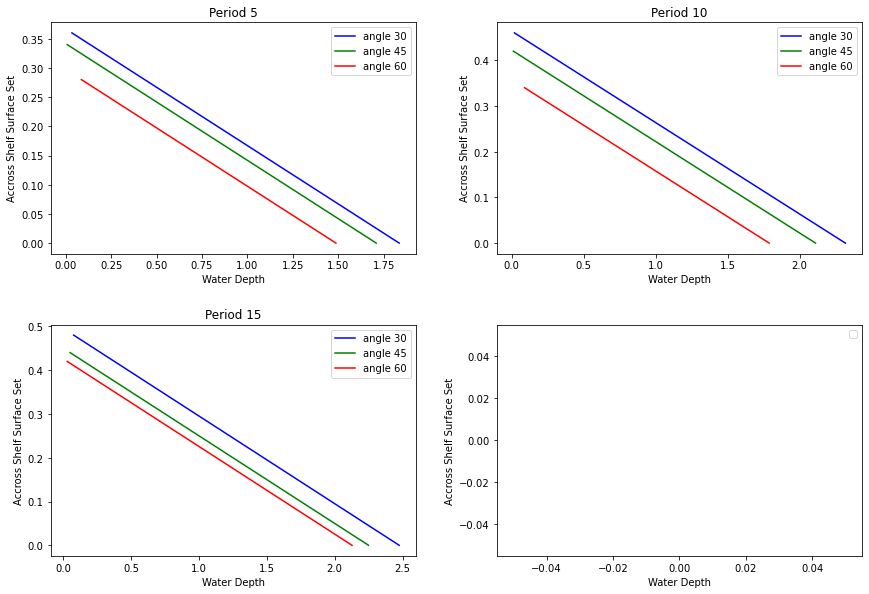

In [16]:
#plot the across shelf drift
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2,figsize=(12, 8))
fig.tight_layout(h_pad=5,w_pad=5)

axs1.set_title("Period 5")
axs2.set_title("Period 10")
axs3.set_title("Period 15")

colors = ["blue","green","red","purple"]
#cycle through angles 30, 45, 60
my_axes = fig.get_axes()
for i in range(3):
    my_axes[0].plot(wave5_set[angle_names[i]][1], wave5_set[angle_names[i]][0],color=colors[i],label=angle_names[i])
    my_axes[1].plot(wave10_set[angle_names[i]][1], wave10_set[angle_names[i]][0],color=colors[i],label=angle_names[i])
    my_axes[2].plot(wave15_set[angle_names[i]][1], wave15_set[angle_names[i]][0],color=colors[i],label=angle_names[i])

for axs in fig.get_axes():
    axs.set(xlabel="Water Depth", ylabel="Accross Shelf Surface Set")
    axs.autoscale()
    axs.legend(loc='upper right')
    
plt.show()

Please discuss the basic across-shore pattern of set-up and set-down and how this is impacted by wave period and the deep-water wave angle in your model.  Be sure to explain why your results are different for different periods and angles.  What are the implications of the predicted set-up/set-down for the across-shelf circulation? 

**The surface set in all instances appears to have a linear relationship with the depth.  As the depth decreases to 0, the Set increases.**

**The total set depends on the depth at which the waves begin breaking which in turn depends on the wave height.**

**All of these waves began in deep water with the same height, but that height increases at the breaking depth due to shoaling and descreases at the breaking depth due to refraction.**  

**The growth in height due to shoaling is driven by the wave period while the reduction in height due to refraction is driven by the incident angle.**

**Greater period leads to greater shoaling and greater surface setup.**

**Greater incident angle leads to greater refraction and reduced surface setup**

In [7]:
#calculate along shelf drift velocity profiles for each wave
drag_coefficient = 0.01
slope = 0.001

#setup dictionaries to store test results
wave5_drift={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
wave10_drift={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
wave15_drift={"angle 30":[[],[]],"angle 45":[[],[]],"angle 60":[[],[]]}
for i in range(len(angles)): #cycle through angles 30, 45, 60
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave5_hb[angle_names[i]],0,-0.1):
        wave5_drift[angle_names[i]][0].append(wm.along_shelf_current(angles[i],float(d),slope,drag_coefficient))
        wave5_drift[angle_names[i]][1].append(d)
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave10_hb[angle_names[i]],0,-0.1):
        wave10_drift[angle_names[i]][0].append(wm.along_shelf_current(angles[i],float(d),slope,drag_coefficient))
        wave10_drift[angle_names[i]][1].append(d)
    #sample at a range of depths, starting with Hb and going to 0 at a step size of -0.1
    for d in np.arange(wave15_hb[angle_names[i]],0,-0.1):
        wave15_drift[angle_names[i]][0].append(wm.along_shelf_current(angles[i],float(d),slope,drag_coefficient))
        wave15_drift[angle_names[i]][1].append(d)

Generate plots showing variation in along shelf drift for different periods and incident angles

With the 4th plot, visualize relationship between incident angle and along shelf drift velocity for a single wave at a Hb depth of 1.5

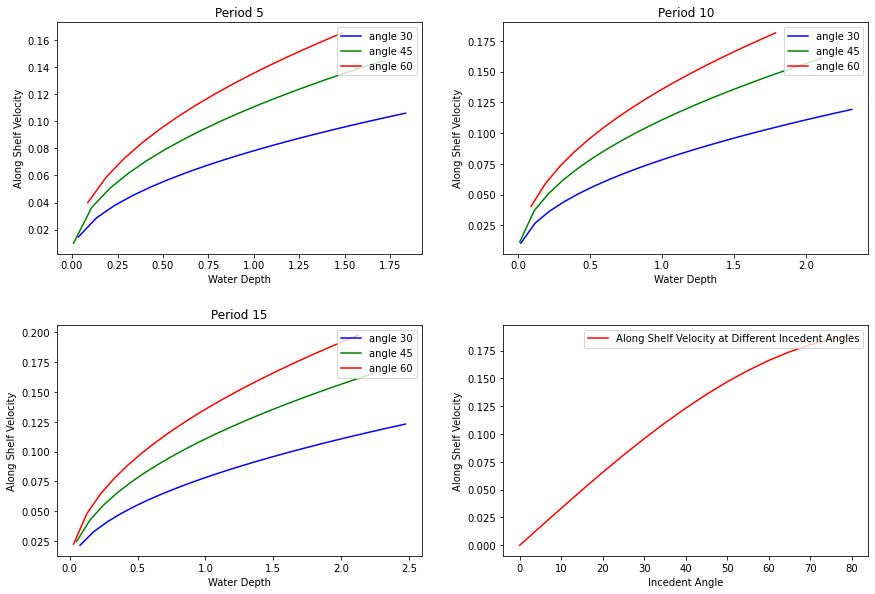

In [17]:
#plot the across shelf drift
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2,figsize=(12, 8))
fig.tight_layout(h_pad=5,w_pad=5)

axs1.set_title("Period 5")
axs2.set_title("Period 10")
axs3.set_title("Period 15")

colors = ["blue","green","red","purple"]
#cycle through angles 30, 45, 60
my_axes = fig.get_axes()
for i in range(3):
    my_axes[0].plot(wave5_drift[angle_names[i]][1], wave5_drift[angle_names[i]][0],color=colors[i],label=angle_names[i])
    my_axes[1].plot(wave10_drift[angle_names[i]][1], wave10_drift[angle_names[i]][0],color=colors[i],label=angle_names[i])
    my_axes[2].plot(wave15_drift[angle_names[i]][1], wave15_drift[angle_names[i]][0],color=colors[i],label=angle_names[i])

for axs in fig.get_axes():
    axs.set(xlabel="Water Depth", ylabel="Along Shelf Velocity")
    axs.autoscale()
    
#use 4th plot to visualize just the angle -> drift velocity relationship    
vs=[]
for deg in range(0,85,5):
    vs.append(wm.along_shelf_current(deg,1.5,slope,drag_coefficient))

axs4.plot(range(0,85,5), vs,color=colors[i],label='Along Shelf Velocity at Different Incedent Angles')
axs4.set(xlabel="Incedent Angle", ylabel="Max Along Shelf Velocity")
for axs in fig.get_axes():
    axs.legend(loc='upper right')

plt.show()

Discuss how the strength of the along-shore wave-driven current varies as a function of both wave period and the deep-water angle. Why does wave period impact the predicted current?  Using words (and equations if helpful), explain the basic physical processes that drive the predicted current.  What are the implications for along-shore sediment transport?

**The wave generated along shelf velocity grows with both wave period and incident angle.**

**The greater the waver period, the greater the increase in wave height due to shoaling creating taller waves that begin breaking in deeper water and result in greater radiation stresses.**

**The incident angle contributes even more to the generated current through a different mechanism.  As the incedent angle increases, the wave heights are reduced through refraction, but a greater percentation of the radiation stress generates by those waves contributes to current along the shelf rather than surface setup across the shelf.**

**In locations where prevailing winds consistently generate waves with high incident angle, the resulting waves product persistent along shelf current and sediment transport.**